In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# !pip install shap
# import shap  # For feature importance analysis
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [35]:
data['Contract Length'].value_counts()

Monthly      22130
Annual       21410
Quarterly    20834
Name: Contract Length, dtype: int64

In [5]:
# Statistical analysis 

data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## 1. Data Preprocessing

In [6]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

No missing values 

In [7]:
data.duplicated().sum()

0

no dulicate data

In [18]:
data_ = data.copy()

In [19]:
# Remove ID Columns 

data_ = data_.drop('CustomerID', axis = 1)

In [20]:
# check target attribute 
data_['Churn'].value_counts()

0    33881
1    30493
Name: Churn, dtype: int64

The classes are balanced. we are good to go

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


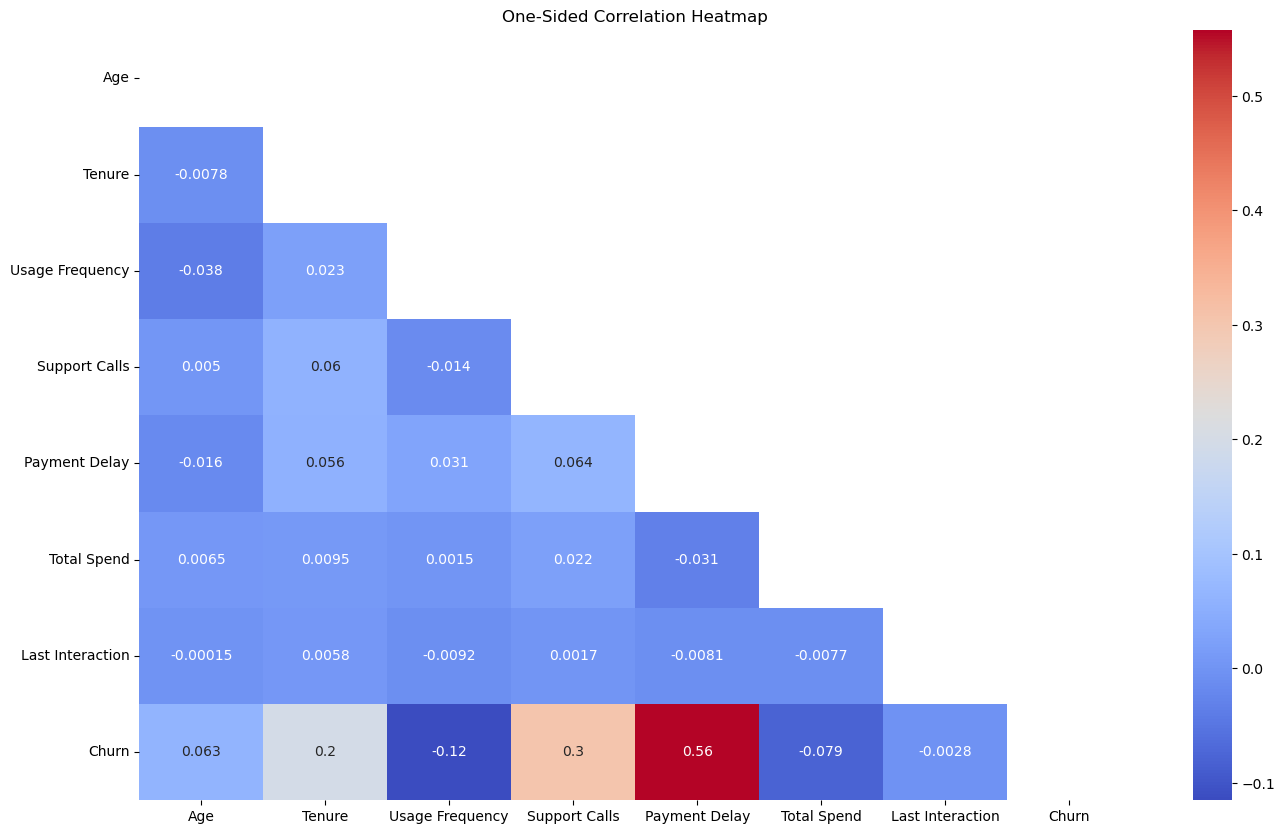

In [21]:
# Check Correlation

# Calculate the correlation matrix
correlation_matrix = data_.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm")

plt.title("One-Sided Correlation Heatmap")
# plt.figure(figsize = (16,10))
plt.show()






target attribute has higher correaltion with Payment Delay. Usage Frequency,   Total Spend and Last interaction has lower correlation with Churn. Let's remove them and use only other 4 as the features 

In [23]:
data_ = data_.drop(['Usage Frequency', 'Total Spend', 'Last Interaction'], axis = 1 )
data_

,Age,Gender,Tenure,Support Calls,Payment Delay,Subscription Type,Contract Length,Churn
0,22,Female,25,4,27,Basic,Monthly,1
1,41,Female,28,7,13,Standard,Monthly,0
2,47,Male,27,2,29,Premium,Annual,0
3,35,Male,9,5,17,Premium,Quarterly,0
4,53,Female,58,9,2,Standard,Annual,0
...,...,...,...,...,...,...,...,...
64369,45,Female,33,6,21,Basic,Quarterly,1
64370,37,Male,6,5,22,Standard,Annual,1
64371,25,Male,39,8,30,Premium,Monthly,1
64372,50,Female,18,7,22,Standard,Monthly,1


In [24]:
# Encoding 
data_['Gender'] = data_['Gender'].factorize()[0]
data_['Subscription Type'] = data_['Subscription Type'].factorize()[0] 
data_['Contract Length'] = data_['Contract Length'].factorize()[0] 

In [25]:
data_

,Age,Gender,Tenure,Support Calls,Payment Delay,Subscription Type,Contract Length,Churn
0,22,0,25,4,27,0,0,1
1,41,0,28,7,13,1,0,0
2,47,1,27,2,29,2,1,0
3,35,1,9,5,17,2,2,0
4,53,0,58,9,2,1,1,0
...,...,...,...,...,...,...,...,...
64369,45,0,33,6,21,0,2,1
64370,37,1,6,5,22,1,1,1
64371,25,1,39,8,30,2,0,1
64372,50,0,18,7,22,1,0,1


In [26]:
X = data_.drop('Churn', axis = 1)
y = data_['Churn'] 

In [27]:
# Scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

In [28]:
# Train Test Split 

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Model Building



In [29]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train,y_train)

In [30]:

from sklearn.metrics import classification_report, accuracy_score

y_pred = dt_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

acc = accuracy_score(y_test, y_pred)
acc

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     10134
           1       0.88      0.88      0.88      9179

    accuracy                           0.89     19313
   macro avg       0.89      0.89      0.89     19313
weighted avg       0.89      0.89      0.89     19313



0.8861906487857919

In [31]:
# Decision tree

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train,y_train)

In [32]:

from sklearn.metrics import classification_report, accuracy_score

y_pred = rf_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

acc = accuracy_score(y_test, y_pred)
acc

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10134
           1       0.93      0.88      0.90      9179

    accuracy                           0.91     19313
   macro avg       0.91      0.91      0.91     19313
weighted avg       0.91      0.91      0.91     19313



0.9117692745818878

Accuracy is too high. Let's take Random Forest model, save and use it. 

In [33]:
# Save the model

import pickle
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(rf_model, model_file)


In [34]:
with open('saved_model.pkl', 'wb') as model_file:
    pickle.dump((rf_model, scaler), model_file)